In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import pickle
import torchvision
from torchvision import datasets, models, transforms, utils


In [8]:
def read_from_pickle(path):
    output = None
    with open(path, 'rb') as file:
        try:
            while True:
                output =  pickle.load(file)
        except EOFError:
            pass
    return output



In [61]:
CAM_path = '/home/ubuntu/deepsolar/src/baseline_CAM_list.pickle'
CAM_list = read_from_pickle(CAM_path)

In [66]:
def extract_prompts_from_cam(cam, img, prompt_threshold):
    # cam_image = cv2.cvtColor(uint_cam, cv2.COLOR_GRAY2BGR)

    prompt_ix = np.argwhere(cam > prompt_threshold)
    print(cam.max())
    print(cam.min())
    cam_to_img_x = img.shape[0] / cam.shape[0]
    cam_to_img_y = img.shape[1] / cam.shape[1]

    prompt_ix_scaled = np.zeros_like(prompt_ix)
    prompt_ix_scaled[:, 0] = prompt_ix[:, 0] * cam_to_img_x + cam_to_img_x / 2
    prompt_ix_scaled[:, 1] = prompt_ix[:, 1] * cam_to_img_y + cam_to_img_y / 2

    return prompt_ix, prompt_ix_scaled


/home/ubuntu/deepsolar/data/ds-usa/eval/1/1/732.png
0.99999964
0.0


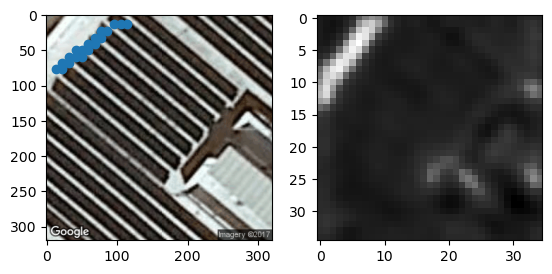

/home/ubuntu/deepsolar/data/ds-usa/eval/1/1/966.png
0.9999999
0.0


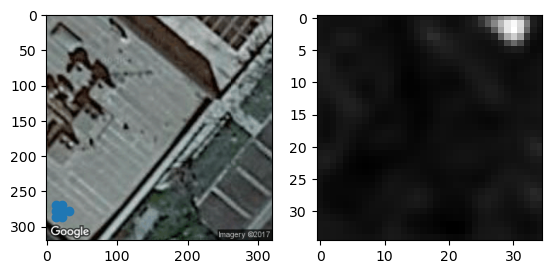

/home/ubuntu/deepsolar/data/ds-usa/eval/1/1/908.png
0.0
0.0


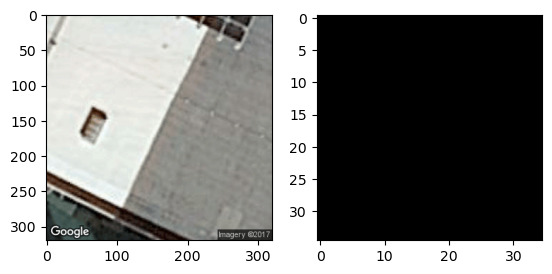

/home/ubuntu/deepsolar/data/ds-usa/eval/1/1/477.png
0.9999997
0.0


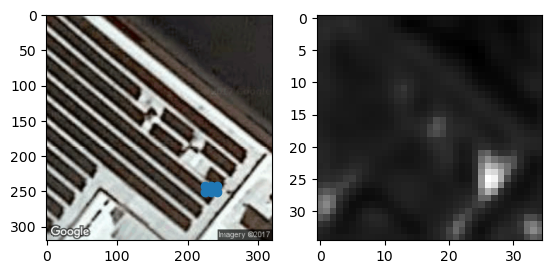

/home/ubuntu/deepsolar/data/ds-usa/eval/10/1/860.png
0.9999997
0.0


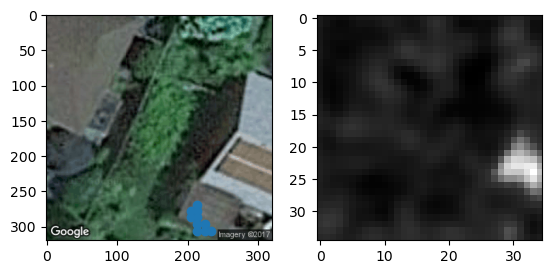

/home/ubuntu/deepsolar/data/ds-usa/eval/10/1/773.png
0.99999994
0.0


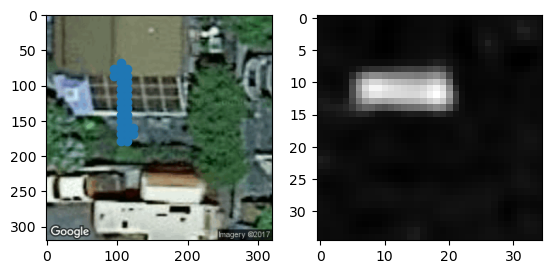

/home/ubuntu/deepsolar/data/ds-usa/eval/10/1/132.png
0.99999994
0.0


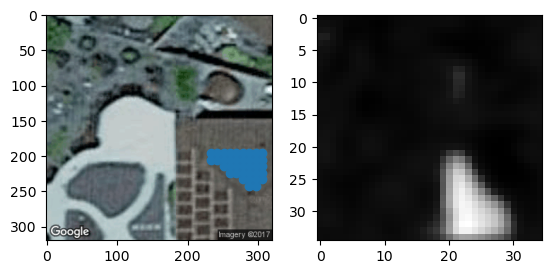

/home/ubuntu/deepsolar/data/ds-usa/eval/10/1/852.png
0.99999964
0.0


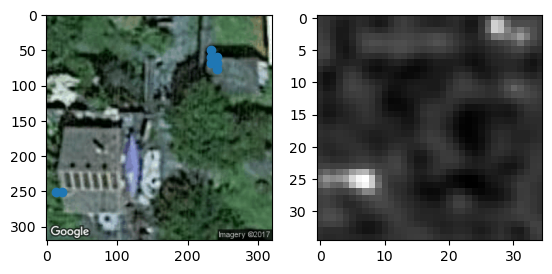

/home/ubuntu/deepsolar/data/ds-usa/eval/10/1/1128.png
0.9999997
0.0


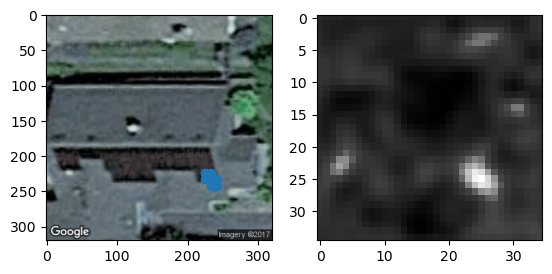

/home/ubuntu/deepsolar/data/ds-usa/eval/10/1/886.png
0.0
0.0


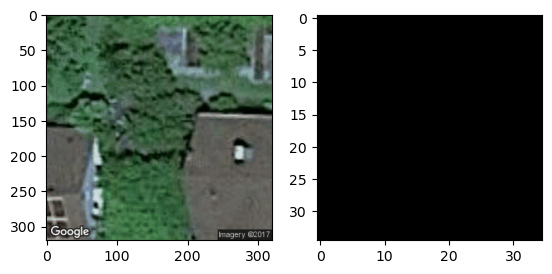

/home/ubuntu/deepsolar/data/ds-usa/eval/10/1/1409.png
0.9999998
0.0


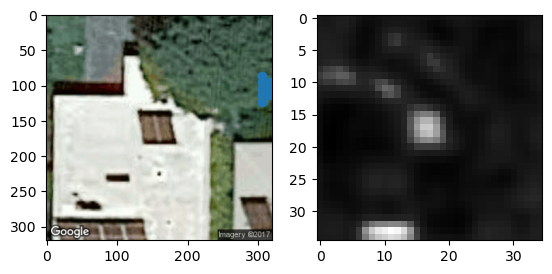

In [67]:
num_to_display = 10
count = 0
for idx, (cam, path) in enumerate(CAM_list): 
    class_label = path.split('/')[-2]
    cam_rescaled = (cam - cam.min())/(cam.max() - cam.min() + 1e-5)
    if class_label == '1':
        count += 1
        img = cv2.imread(path, flags=cv2.IMREAD_COLOR)
        print(path)
        # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        f, axes = plt.subplots(1, 2)
        axes[0].imshow(img)
        axes[0].axis('on')

        axes[1].imshow(cam_rescaled, cmap=plt.cm.gray)
        axes[1].axis('on')

        prompts, scaled_prompts = extract_prompts_from_cam(cam_rescaled, img, 0.8)
        axes[0].scatter(scaled_prompts[:,0], scaled_prompts[:,1])
        plt.show()

        if count > num_to_display:
            break